<a href="https://colab.research.google.com/github/alwanfa/neural-network-exploration/blob/main/DUDL_weights_identicalRandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import copy

import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [5]:
net = nn.Sequential(
    nn.Linear(2, 8),
    nn.Linear(8,1),
    nn.Linear(1,1)
)

In [32]:
net_noseed = copy.deepcopy(net)
for p in net_noseed.named_parameters():
  if 'weight' in p[0] :
    nn.init.xavier_normal_(p[1].data)

In [11]:
net_rs1a = copy.deepcopy(net)

torch.manual_seed(1)
for p in net_rs1a.named_parameters():
  if 'weight' in p[0] :
    nn.init.xavier_normal_(p[1].data)

In [13]:
net_rs2 = copy.deepcopy(net)

torch.manual_seed(2)
for p in net_rs2.named_parameters():
  if 'weight' in p[0] :
    nn.init.xavier_normal_(p[1].data)

In [12]:
net_rs1b = copy.deepcopy(net)

torch.manual_seed(1)
for p in net_rs1b.named_parameters():
  if 'weight' in p[0] :
    nn.init.xavier_normal_(p[1].data)

In [36]:
net_noseed_params = []
net_rs1a_params = []
net_rs2_params = []
net_rs1b_params = []
for i in range(3):
  net_noseed_params = np.append(net_noseed_params, net_noseed[i].weight.view(-1).detach().numpy())
  net_rs1a_params = np.append(net_rs1a_params, net_rs1a[i].weight.view(-1).detach().numpy())
  net_rs2_params = np.append(net_rs2_params, net_rs2[i].weight.view(-1).detach().numpy())
  net_rs1b_params = np.append(net_rs1b_params, net_rs1b[i].weight.view(-1).detach().numpy())

net_noseed_params

array([-0.57887799, -0.0108729 , -0.10525607, -0.31694451, -0.38743234,
       -0.11879336,  0.0744812 ,  0.35378987, -0.41679466, -0.38364869,
       -0.43144175, -0.04433924, -0.1338803 , -0.02905761, -0.70302397,
       -0.59080237, -0.1124182 ,  0.07350384, -0.0757714 ,  0.19668585,
        0.47157577,  0.28320196,  0.05175803, -0.39651364, -0.29079723])

[]

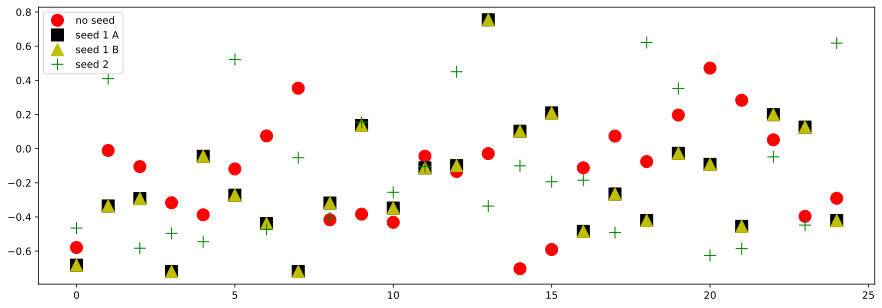

In [42]:
fig = plt.figure(figsize = (15,5))

plt.plot(net_noseed_params, 'ro', label = "no seed", markersize = 12)
plt.plot(net_rs1a_params, 'ks', label = "seed 1 A", markersize = 12)
plt.plot(net_rs1b_params, 'y^', label = "seed 1 B", markersize = 12)
plt.plot(net_rs2_params, 'g+', label = "seed 2", markersize = 12)
plt.legend()
plt.plot()

In [43]:
print(net_rs1a_params-net_rs1b_params)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
